### Importing libraries

In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from utils import clean_data, find_optimal_clusters, plot_cluster_metrics

### Data transformation and descriptive analysis

In [67]:
# Load the dataset
df = pd.read_csv('../data/profiles_dataset.csv')
df.head()

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,1443,1586,20,NaN,6794435137251820550,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,1422,3843,225,NaN,7019722709156430853,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
2,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,NaN,False,1960,243,24000,228,NaN,6826677567140873222,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
3,2023-08-06,nutrifersanort,L.N Fernanda Sánchez,"Nutrióloga, educadora en diabetes.",0.469767,0.004651,0.465116,NaN,False,43,41,100,5,NaN,6809397670235407365,https://www.tiktok.com/@nutrifersanort/video/7...,https://www.tiktok.com/@nutrifersanort,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
4,2023-07-25,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,NaN,False,276,2262,126,4,NaN,6810526136080483334,https://www.tiktok.com/@bhgdee/video/719722663...,https://www.tiktok.com/@bhgdee,https://p16-sign.tiktokcdn-us.com/tos-useast5-...


In [68]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                1000 non-null   object 
 1   account_id               1000 non-null   object 
 2   nickname                 1000 non-null   object 
 3   biography                997 non-null    object 
 4   awg_engagement_rate      1000 non-null   float64
 5   comment_engagement_rate  1000 non-null   float64
 6   like_engagement_rate     1000 non-null   float64
 7   bio_link                 191 non-null    object 
 8   is_verified              1000 non-null   bool   
 9   followers                1000 non-null   int64  
 10  following                1000 non-null   int64  
 11  likes                    1000 non-null   int64  
 12  videos_count             1000 non-null   int64  
 13  create_time              0 non-null      float64
 14  id                       

(1000, 18)

In [69]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Ceiling division

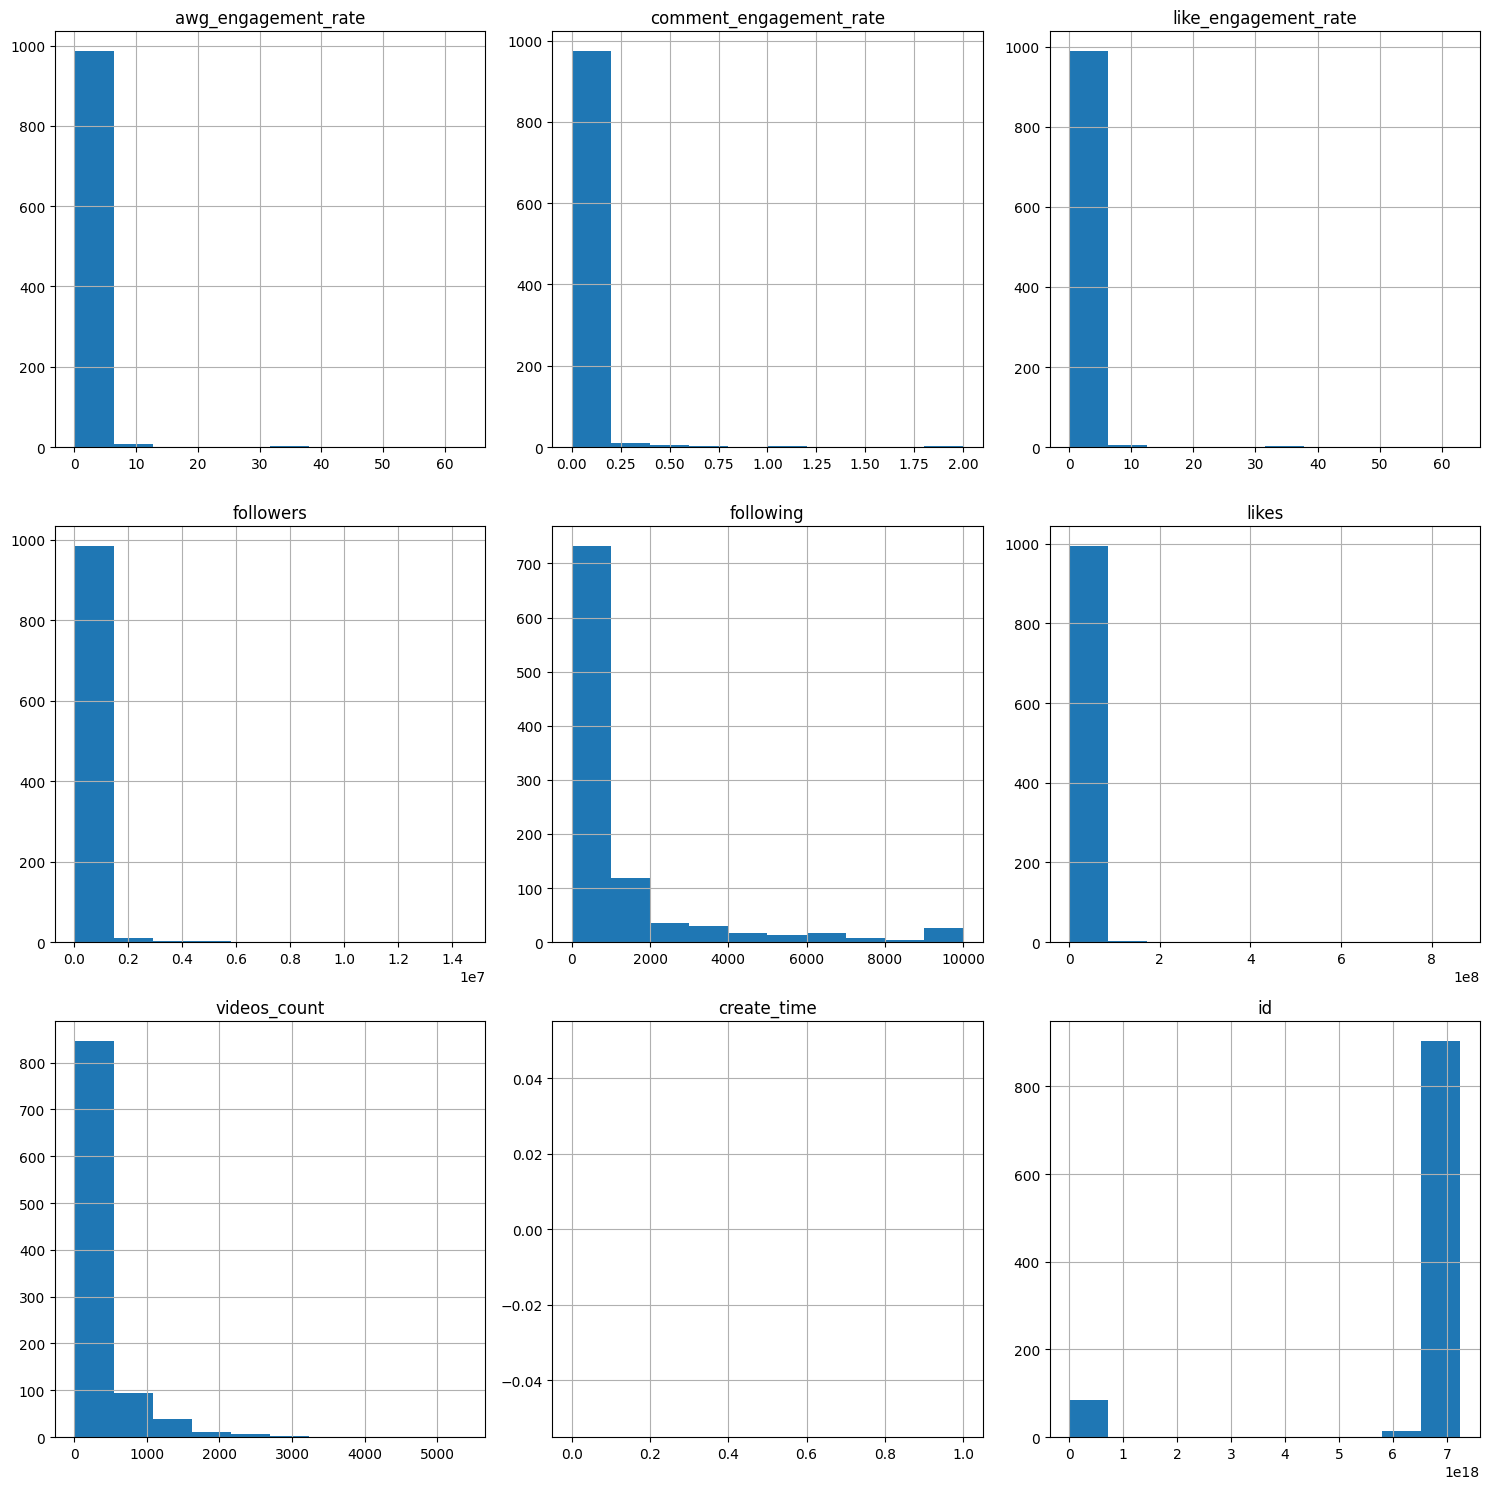

In [70]:
### Histograms

plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    df[col].hist(bins=10)
    plt.title(col)
plt.tight_layout()
plt.show()

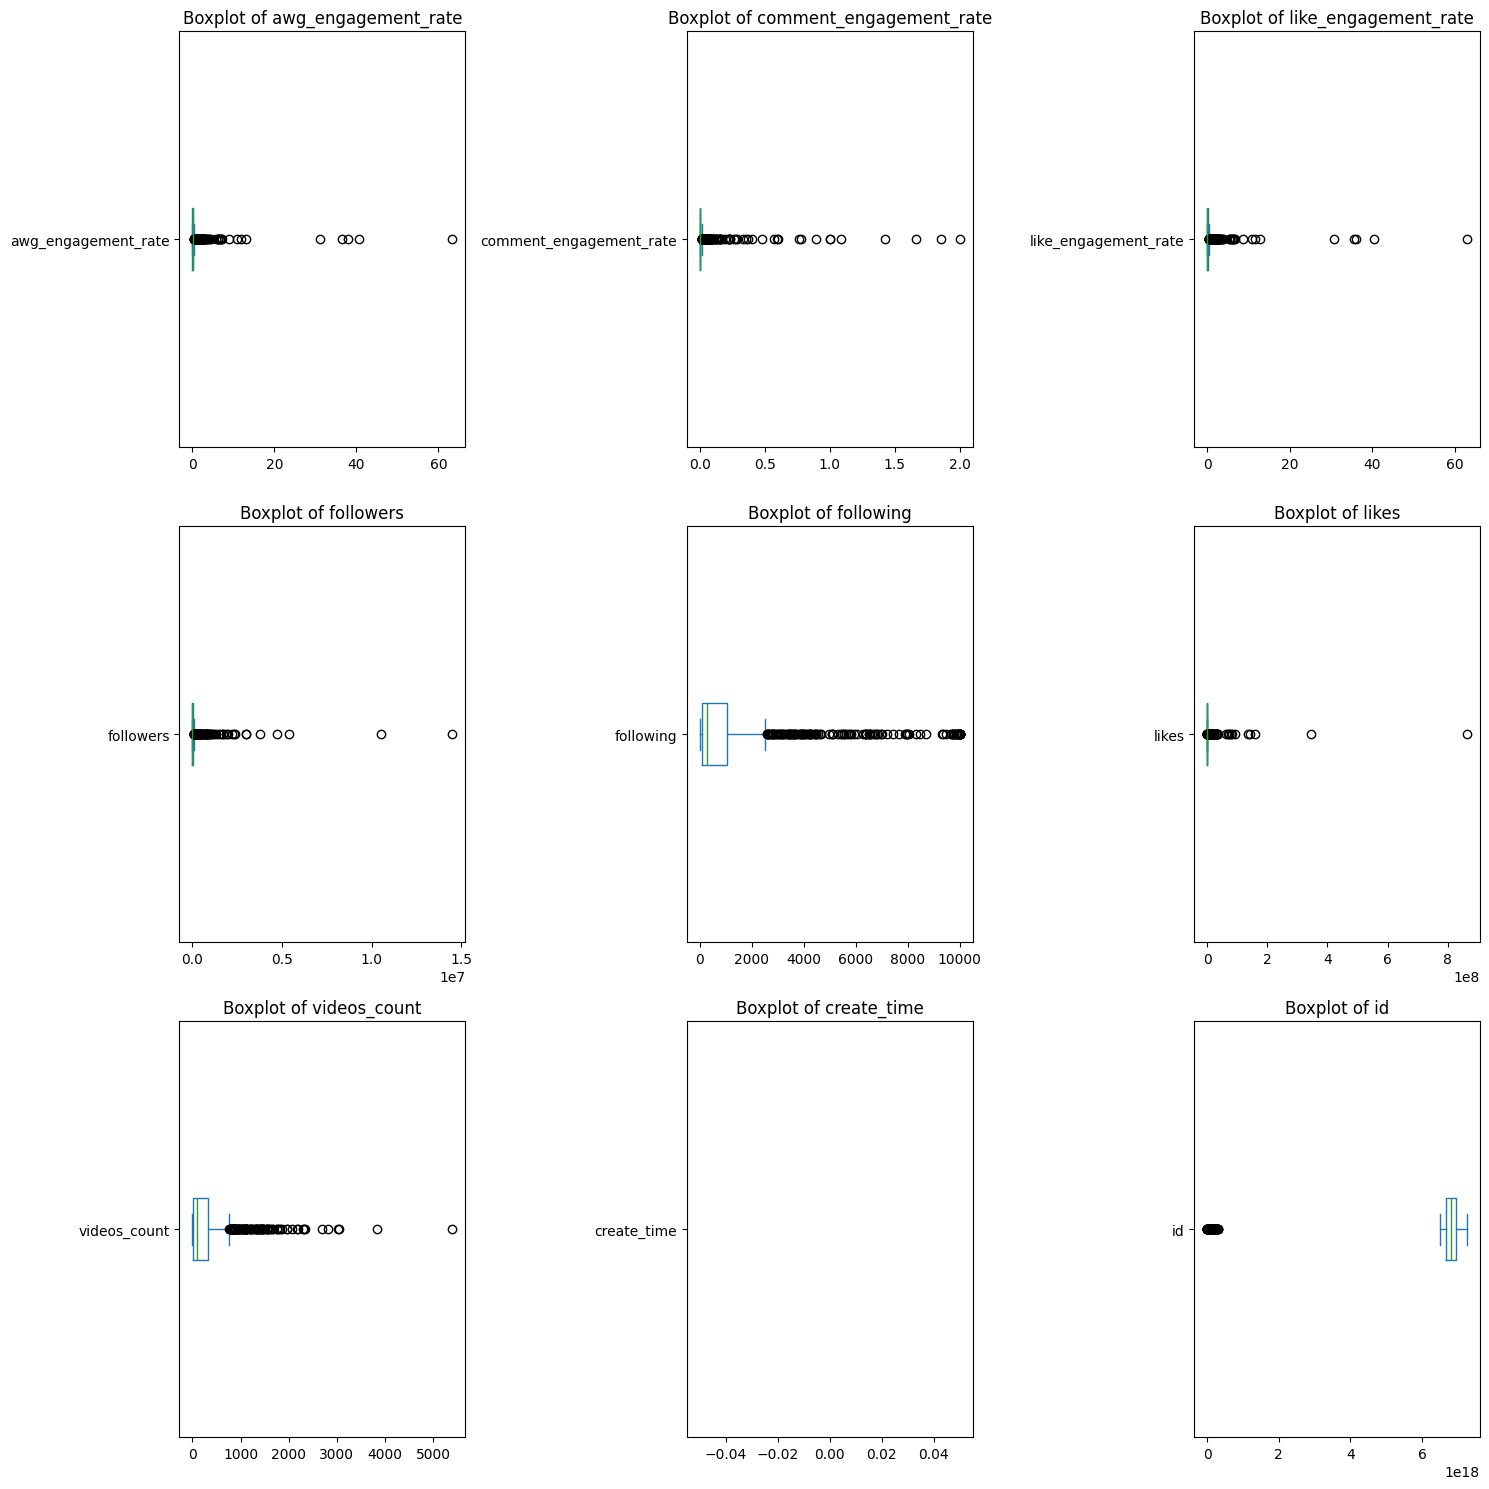

In [71]:
### Box Plots
plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    df[col].plot(kind='box', vert=False)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

/var/folders/1x/jp3vqcs53vv9kxc9f40hgztc0000gn/T/ipykernel_64852/4060326769.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], fill=True)


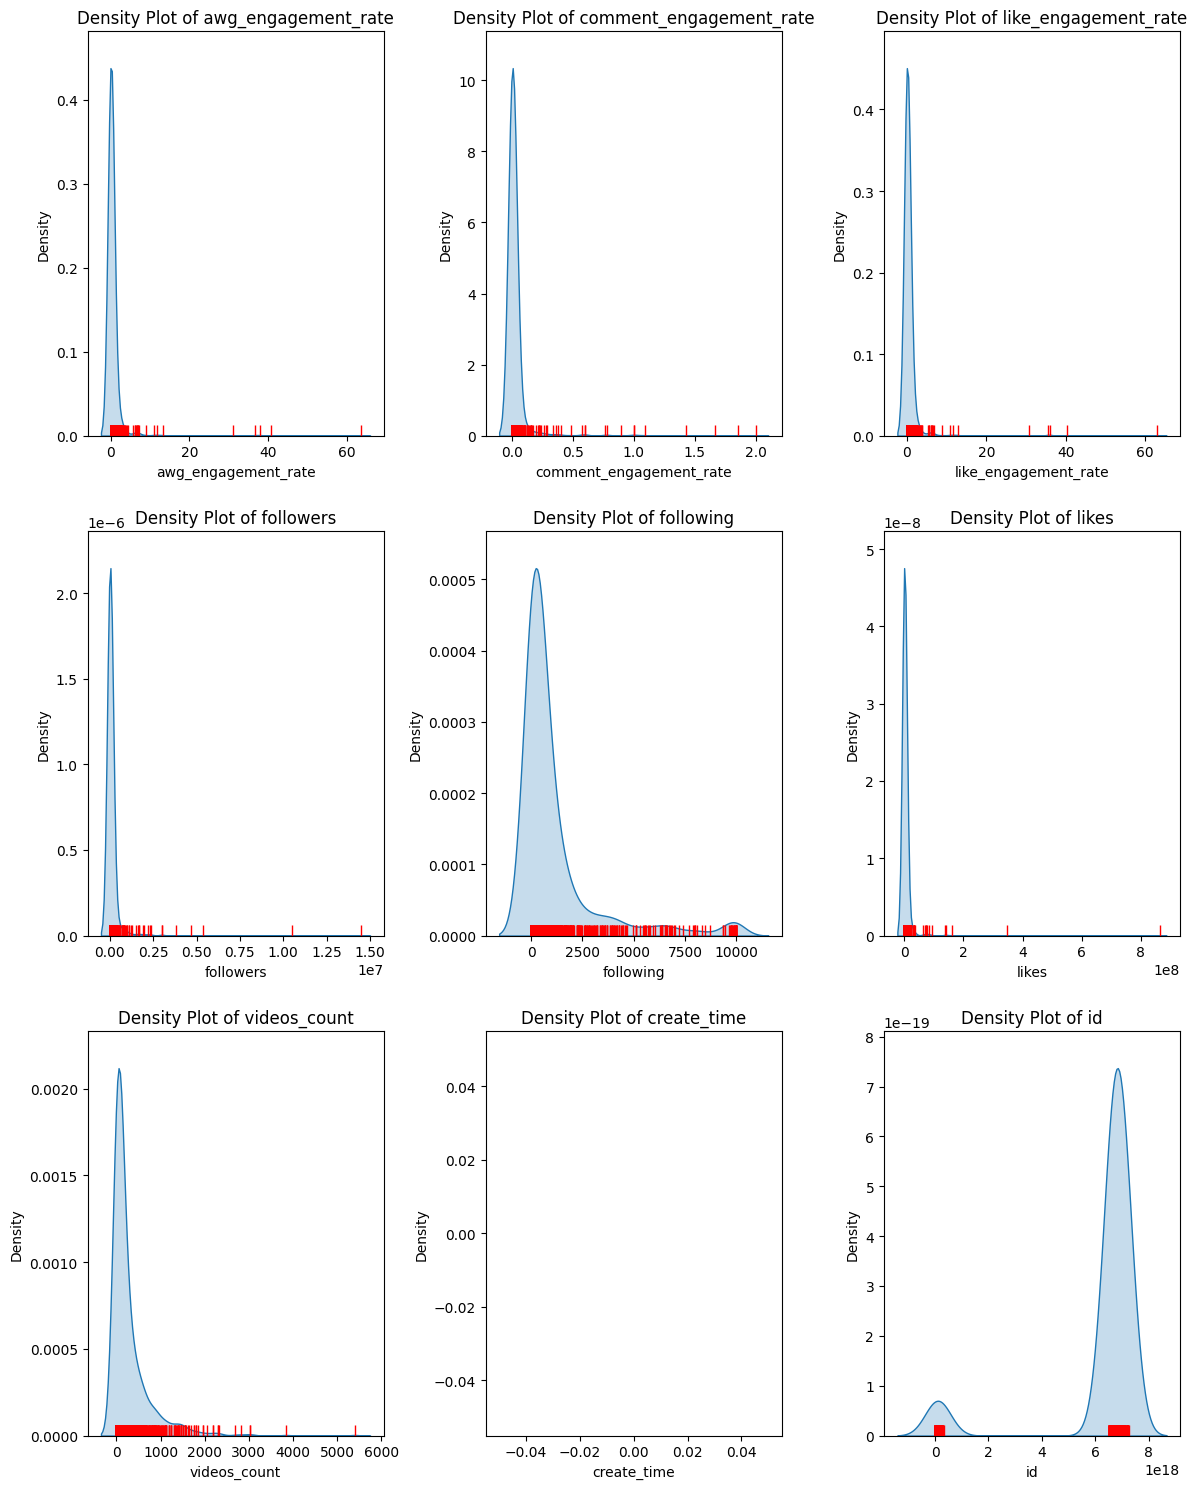

In [72]:
### Density Plots
plt.figure(figsize=(12, 5 * n_rows))
for idx, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.kdeplot(df[col], fill=True)
    sns.rugplot(df[col], color='red')
    plt.title(f"Density Plot of {col}")
plt.tight_layout()
plt.show()

In [73]:
### Scatter Plot
if "Income_BDSA" in df.columns and "Unemployment_BDSA" in df.columns:
    plt.scatter(df["Income_BDSA"], df["Unemployment_BDSA"], color='blue', marker='x')
    plt.title("Income vs. Unemployment")
    plt.xlabel("Income")
    plt.ylabel("Unemployment Rate")
    plt.axhline(y=6, color='red', linestyle='--')
    plt.tight_layout()
    plt.show()

### Data Cleaning

In [74]:
df_clean = clean_data(df)

# Select features for clustering
feature_cols = [
    'awg_engagement_rate', 
    'comment_engagement_rate', 
    'like_engagement_rate',
    'followers',
    'following',
    'likes',
    'videos_count',
    'is_verified'
]

Duplicates found: 0


### Preprocessing the Data
Select relevant features for the analysis, and encode categorical variables if necessary, and getting the data ready for clustering.

In [75]:
# Encode the 'is_verified' boolean column as an integer
df_clean['is_verified'] = df_clean['is_verified'].astype(int)

In [78]:
# Create a subset with selected features
df_features = df_clean[feature_cols].copy()

In [ ]:
# Handle outliers in engagement metrics
engagement_cols = ['awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate','followers','likes','videos_count']
for col in engagement_cols:
    df_features[col] = np.log1p(df_features[col])

Dataset shape after removing outliers: (1000, 8)


In [81]:
numeric_cols = df_features.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Ceiling division

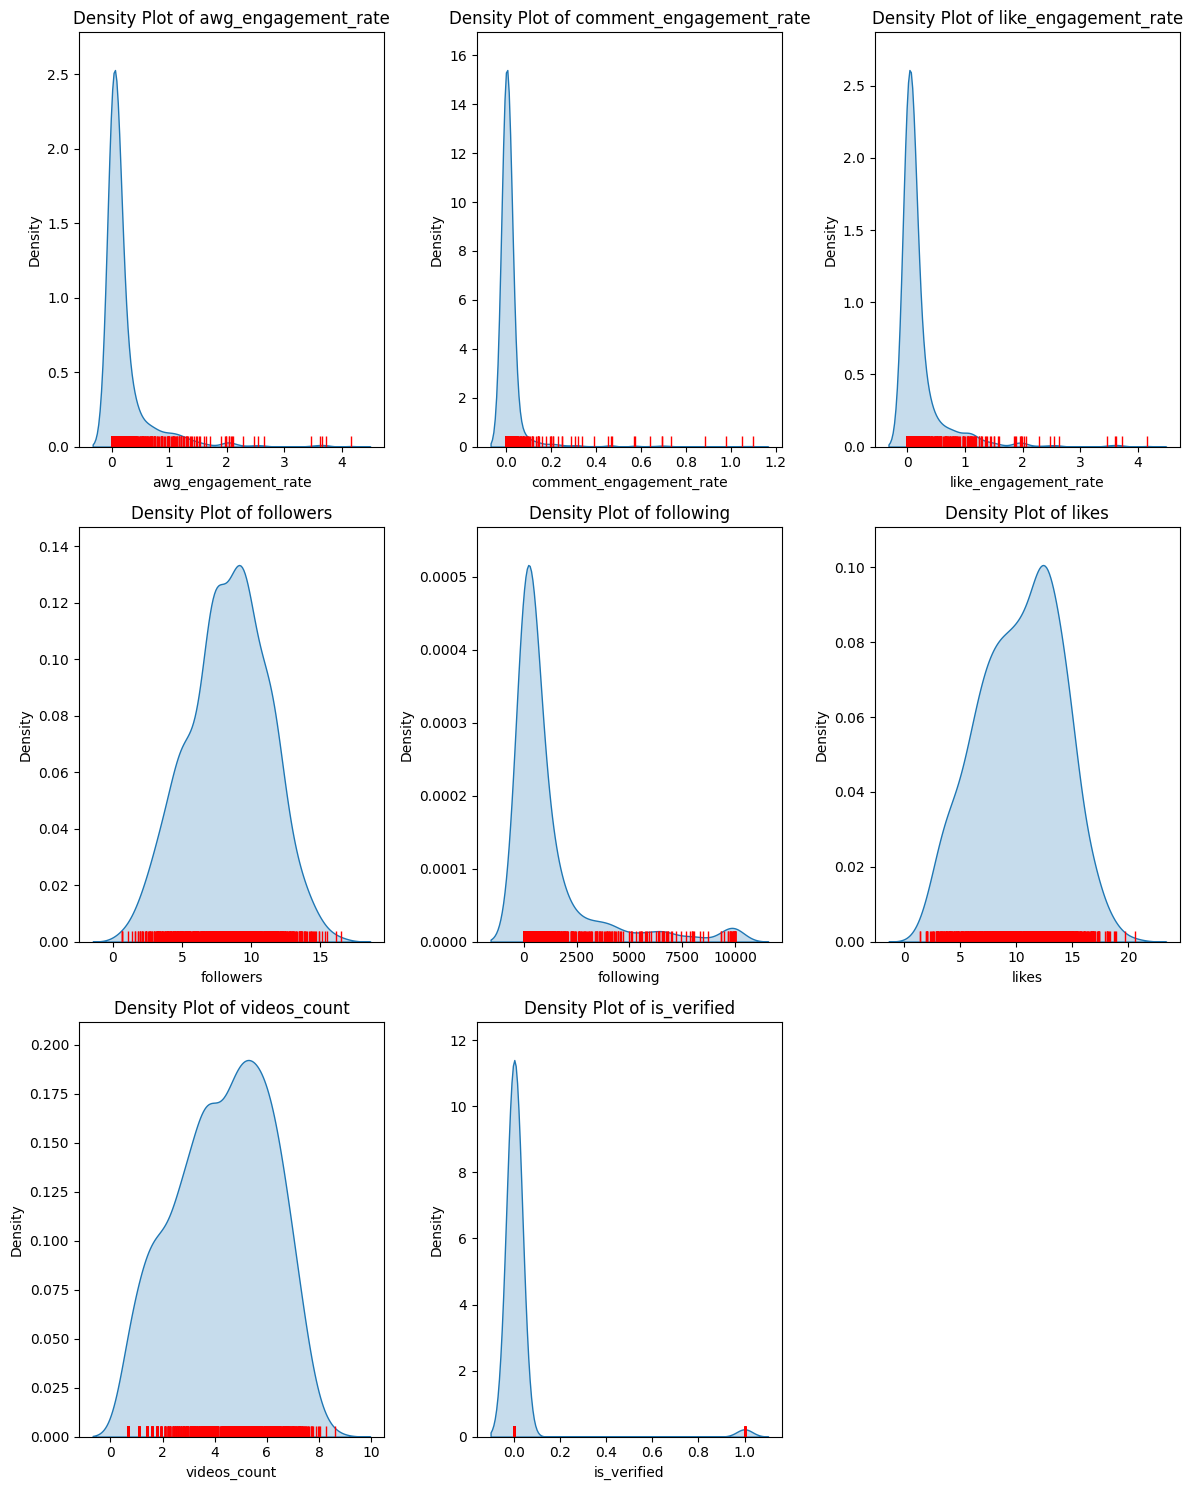

In [82]:
### Density Plots
plt.figure(figsize=(12, 5 * n_rows))
for idx, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.kdeplot(df_features[col], fill=True)
    sns.rugplot(df_features[col], color='red')
    plt.title(f"Density Plot of {col}")
plt.tight_layout()
plt.show()

In the context of social media influencer data, what we're seeing is actually a natural phenomenon rather than problematic outliers.

The distribution typically follows a power law, where:

There are many small accounts (micro-influencers)
A moderate number of medium-sized accounts
A few very large accounts (mega-influencers/celebrities)
In this case, removing outliers might actually eliminate important segments of our analysis, particularly the valuable mega-influencers.

### Feature Scaling
K-means clustering is sensitive to the scale of the data, in this case we apply Standard Scaler because the data is spread out and there are many outliers

In [83]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

### Optimal Number of Clusters
Use the Elbow Method to determine the most appropriate number of clusters for k-means clustering. Generally the range of cluster values oftenly chosen are from 1 to 7.

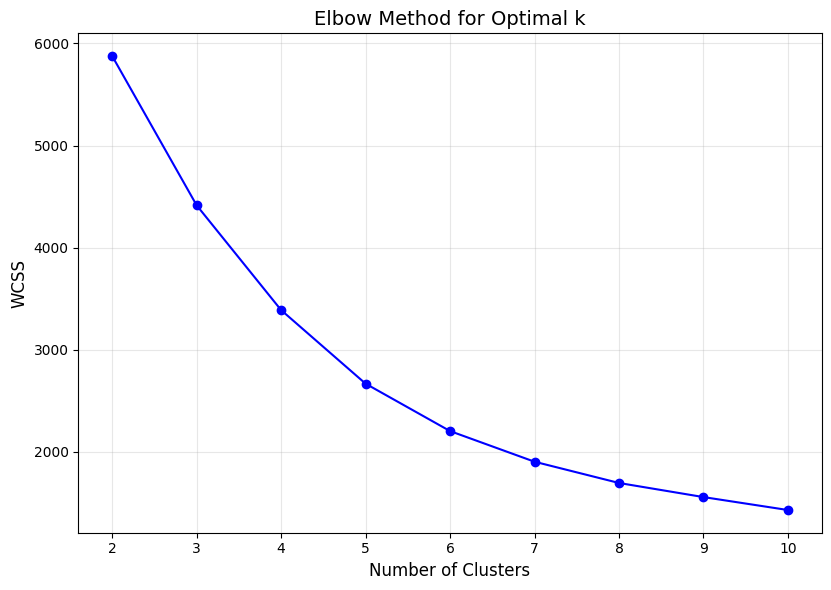

In [90]:
# Find optimal number of clusters
wcss = find_optimal_clusters(scaled_features)
plot_cluster_metrics(wcss)

### K-Means Clustering
Perform k-means clustering using the optimal number of clusters determined in the previous step.

In [108]:
# Choose optimal k and perform clustering
optimal_k = 4 # Based on plots
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df_features['cluster'] = kmeans.fit_predict(scaled_features)

### Visualizing Clusters
Plot the clusters to visually assess how distinct they are from each other.

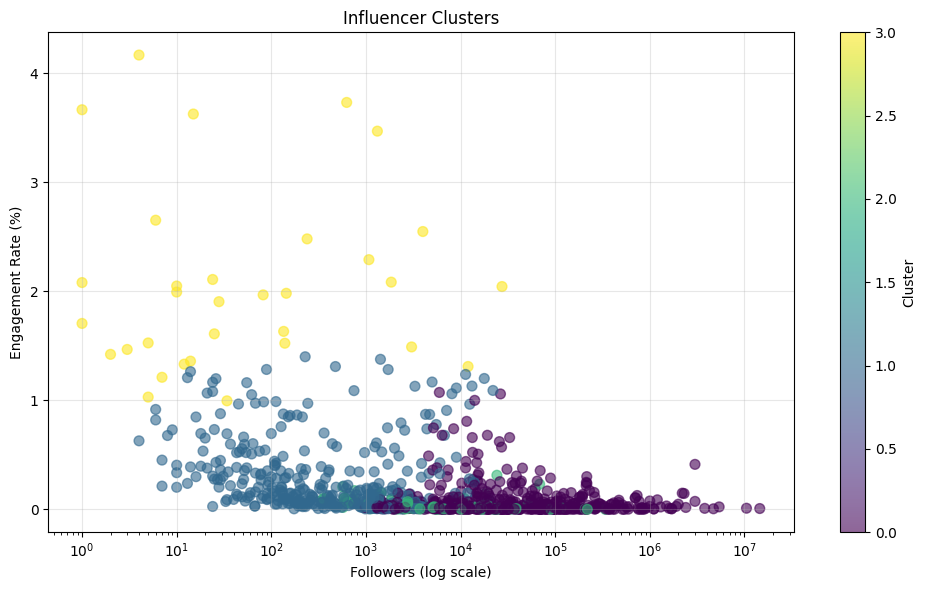

In [110]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    np.exp(df_features['followers']) - 1,  # Reverse log1p transformation for actual values
    df_features['awg_engagement_rate'],
    c=df_features['cluster'], 
    cmap='viridis', 
    alpha=0.6,
    s=50  # Slightly larger point size for better visibility
)
plt.xscale('log')
plt.xlabel('Followers (log scale)')
plt.ylabel('Engagement Rate (%)')
plt.title('Influencer Clusters')
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

1. Purple Cluster (0): Mega-influencers/Celebrities
- Followers: 10⁴ to 10⁷ (10,000 to 10M+)
- Very low engagement rates (<0.5%)
- This is typical for very large accounts where the sheer size of the audience leads to lower engagement percentages
  
2. Blue Cluster (1): Mid-tier Influencers
- Followers: 10² to 10⁴ (100 to 10,000)
- Moderate engagement rates (0.5-1.5%)
- Represents the "sweet spot" of influencer marketing with decent reach and engagement
  
3. Yellow Cluster (2): Micro-influencers
- Followers: 10⁰ to 10² (1 to 1,000)
- High engagement rates (2-4%)
- These are niche accounts with highly engaged communities

### Analyzing Cluster Centroids
Examine the centroids of the clusters to understand the defining characteristics of each cluster. This helps in interpreting the types of influencers within each cluster.


Segment Analysis:
                          followers       awg_engagement_rate videos_count  \
                             median count                mean         mean   
segment                                                                      
Engaged Micro-Influencers     8.622    81               0.035        5.223   
Mega-Influencers             10.339   493               0.075        5.511   
Mid-Tier Creators             6.117   394               0.274        2.899   

                          is_verified  
                                 mean  
segment                                
Engaged Micro-Influencers       0.000  
Mega-Influencers                0.039  
Mid-Tier Creators               0.000  


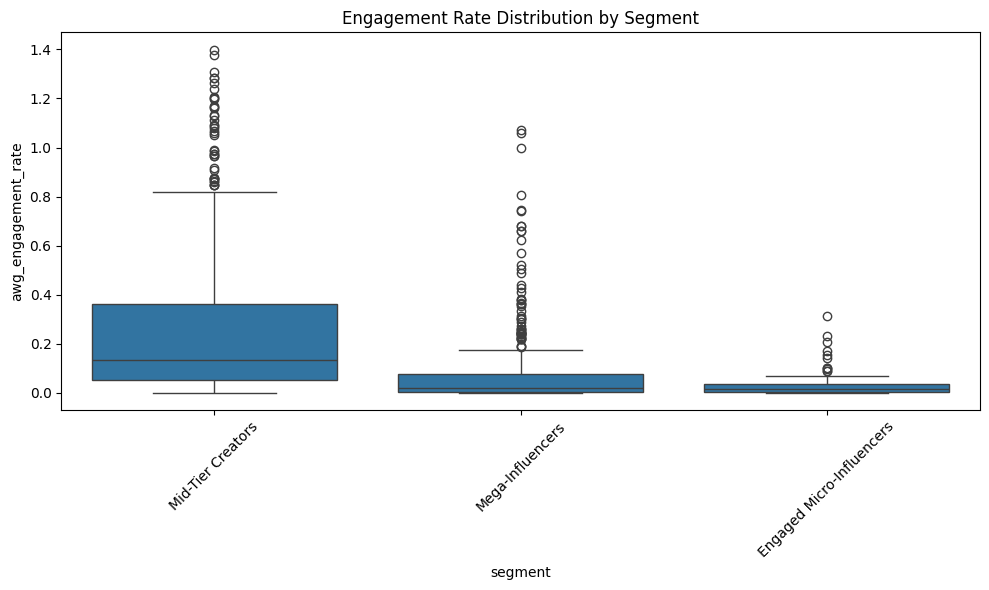

In [111]:
# Create segment labels
segment_names = {
    0: "Mega-Influencers",
    1: "Mid-Tier Creators",
    2: "Engaged Micro-Influencers"
}

# Map cluster numbers to segment names
df_features['segment'] = df_features['cluster'].map(segment_names)

# Calculate key metrics per segment
segment_analysis = df_features.groupby('segment').agg({
    'followers': ['median', 'count'],
    'awg_engagement_rate': 'mean',
    'videos_count': 'mean',
    'is_verified': 'mean'
}).round(3)

print("\nSegment Analysis:")
print(segment_analysis)

# Visualize engagement distribution by segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='segment', y='awg_engagement_rate', data=df_features)
plt.xticks(rotation=45)
plt.title('Engagement Rate Distribution by Segment')
plt.tight_layout()
plt.show()